### Netid: al2473 & yh374

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ramen-ratings.csv')

#### Link to dataset on Kaggle: https://www.kaggle.com/residentmario/ramen-ratings/data
#### Zip File Download: https://www.kaggle.com/residentmario/ramen-ratings/download

## Question: Is there a relationship between the way instant ramen is presented and the rating of stars received in Japan?

#### Context: Ramen is presented in many different ways. It can be presented in a cup, bowl, pack, or tray. This data visualization project seeks to graphically understand whether or not there is a relationship between ramen being displayed in a cup, bowl, pack, or tray with the number of stars received for Japanese instant ramen.

#### Hypothesis: The ramen presented in a bowl and cup will receive higher ratings than the ramen packaged in a pack or tray, because the bowl and cup packaging might feel closer to the way ramen is served at a restaurant or store. On the other hand, the experience of eating ramen from a pack or tray might feel 'cheaper' or less luxurious, hence, leading to a lower rating than it would get if packaged in a bowl or cup.



## Data Manipulation and Preprocessing

In [23]:
#Getting the data from ramen specifically from Japan
japan=df.loc[(df['Country']=='Japan')]
japan.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,NaN


In [24]:
#Making new dataset with columns as: country, way ramen is presented, and ratings
df_filtered = pd.DataFrame({
                    'Country': japan['Country'],
                    'Cup': (japan['Style']=='Cup'),
                    'Bowl':(japan['Style']=='Bowl'),
                    'Pack':(japan['Style']=='Pack'),
                    'Tray':(japan['Style']=='Tray'),
                    'Rating':japan['Stars'],
                   })

df_cup=df_filtered.loc[(df_filtered['Cup']==True)]
df_bowl=df_filtered.loc[(df_filtered['Bowl']==True)]
df_pack=df_filtered.loc[(df_filtered['Pack']==True)]
df_tray=df_filtered.loc[(df_filtered['Tray']==True)]

df_filtered.head()

,Country,Cup,Bowl,Pack,Tray,Rating
0,Japan,True,False,False,False,3.75
6,Japan,True,False,False,False,4
7,Japan,False,False,False,True,3.75
8,Japan,False,False,True,False,0.25
13,Japan,False,True,False,False,4.5


## Data Visualization

### Bar Graph

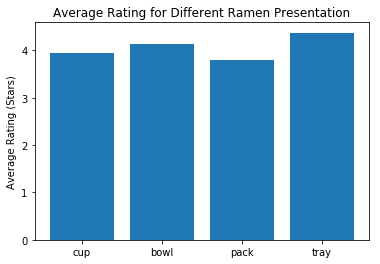

In [25]:
bar1 =(pd.to_numeric(df_cup['Rating']).mean())
bar2 =(pd.to_numeric(df_bowl['Rating']).mean())
bar3 =(pd.to_numeric(df_pack['Rating']).mean())
bar4 =(pd.to_numeric(df_tray['Rating']).mean())

plt.bar([0,1,2,3],[bar1,bar2,bar3,bar4],align='center')
plt.title('Average Rating for Different Ramen Presentation')
plt.xticks([0,1,2,3],['cup','bowl','pack','tray'])
plt.ylabel('Average Rating (Stars)')
plt.show()

### Inference from Bar Graph
#### The bar chart shows that the ramen presented in a tray has the highest average rating at approximately 4.7 stars. The bowl received the second highest average rating at around 4.1 stars, cup came third in rating at approximately 3.9 stars, and pack came last in rating at around 3.7 stars. Through this bar chart, we can come to the inference that instant ramen packaged in trays have the highest average rating and ramen packaged in packs have the lowest rating. This deviates from what was written in the original hypothesis, since trays have the highest average rating rather than a lower average rating. The rest of the bar chart shows a trend similar to what is written in the hypothesis, in which it is claimed that bowl and cup will have a higher rating than pack. However, we cannot come to the conclusion that any ramen packaged in a tray will have a higher rating than if it were to be packaged in a bowl, cup, or pack, since this bar graph does not take into account the other factors of determining ramen rating, such as flavor, brand, etc. 


### Correlation Plot

In [26]:

df_filtered['Rating'] = pd.to_numeric(df_filtered['Rating'])

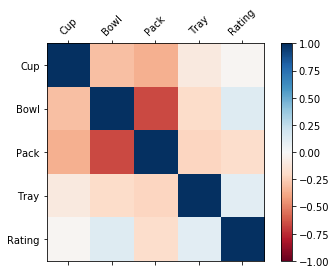

In [27]:
# get the correlation matrix
corr = df_filtered.corr()

#print(japan)
#print(corr)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(corr)

fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

### Inference from Correlation Plot

#### This correlation plot shows that there is no correlation between cup and rating (0.00), some correlation between bowl or tray and rating (0.25), and a slightly negative correlation between rating and pack(-0.25). This correlation plot shows that there is a relatively weak correlation overall between rating and type of presentation for the ramen. However, it does provide us with further information regarding correlations that the bar graph is not able to present. From the bar graph, it is easy to assume that there might be a relative correlation between the different packaging methods and overall average rating. However, this correlation plot reveals that assumption may not be completely true, since the plot is showing relatively lower correlations. As an extra note, although the research question is focused on specifically the presentation of ramen and ratings, it is interesting to note that there is a highly negative correlation between bowl and pack (-0.75), which means that there is an inverse relationship between the pack and bowl packaging. 